Here we will use the data extract using Spotify API and try classify a track as being from `Evanescence` (label = 1) or `Within Temptation` (label = 0) based on audio features.

# Loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import emoji

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

pd.set_option('display.max_colwidth', 0)
TodaysDate = time.strftime("%Y-%m-%d")

# Loading data

In [2]:
df_evanescence = pd.read_csv("./data/info_tracks_evanescence_without_duplicates_2020-05-31.csv")
df_evanescence.head()

,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Wasted On You,2020-04-24,2020,7ui6fTzMeE6JCr0GWvc14n,wasted on you,262499,59,https://p.scdn.co/mp3-preview/63aae1f4675e5848855f6236ae792f3a7fac22c2?cid=63a77ff40e794a12ae216a18befde98c,0.326,0.539,10,-6.862,0,0.0399,0.00096,0.002230,0.0644,0.2170,185.731
1,The Chain,2019-11-22,2019,5F29kjOr9bYTUtSPLoixHB,the chain,252066,46,https://p.scdn.co/mp3-preview/96cb324c53460226c89a9f9a8631ffcd1621465b?cid=63a77ff40e794a12ae216a18befde98c,0.455,0.809,9,-5.845,1,0.0521,0.00286,0.000296,0.0998,0.2370,76.036
2,Synthesis,2017-11-08,2017,3nK9XoQh7wR3iOaWfMLXAr,overture,57560,9,NaN,0.149,0.056,9,-20.266,1,0.0453,0.96300,0.745000,0.1080,0.0343,96.103
3,Synthesis,2017-11-08,2017,23M0gC4uZGwVhbWsHdtdyY,never go back,290546,11,NaN,0.292,0.589,4,-5.541,0,0.0432,0.59300,0.000696,0.1640,0.0555,124.749
4,Synthesis,2017-11-08,2017,4HDd1hurlRFK7Mz1BCnv1f,hi lo,307720,12,NaN,0.447,0.607,3,-6.533,0,0.0314,0.75000,0.000278,0.1060,0.2580,92.895


In [3]:
df_within_temptation = pd.read_csv("./data/info_tracks_within_temptation_without_duplicates_2020-05-31.csv")
df_within_temptation.head()

,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Entertain You,2020-05-08,2020,70HVKogWbgiA4XaXa2GowH,entertain you,211045,61,https://p.scdn.co/mp3-preview/3bb74739f51b566347077a64e58688787fd87111?cid=63a77ff40e794a12ae216a18befde98c,0.559,0.878,1,-4.341,0,0.0403,0.000471,0.000002,0.218,0.597,137.114
1,Resist (Extended Deluxe),2019-02-01,2019,6XnPopwCZ6odHVVqMsllL5,the reckoning,251106,57,NaN,0.310,0.825,1,-4.530,1,0.0563,0.003560,0.000000,0.641,0.475,89.885
2,Resist (Extended Deluxe),2019-02-01,2019,5uDWqYSiWqWTXK9CbAKIA8,endless war,249360,51,NaN,0.452,0.865,3,-4.502,0,0.0511,0.002120,0.000000,0.281,0.260,144.988
3,Resist (Extended Deluxe),2019-02-01,2019,0lNhWQBiA483reJSVovSWF,raise your banner,334360,50,NaN,0.383,0.889,1,-6.784,1,0.0986,0.000269,0.000491,0.104,0.322,173.983
4,Resist (Extended Deluxe),2019-02-01,2019,4GBbBy05LoSveNxjKxj26m,supernova,336080,53,NaN,0.203,0.928,4,-4.838,0,0.0823,0.003270,0.000000,0.355,0.410,95.298


# Pre-process data

## Evanescence

In [4]:
df_evanescence.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   album_name          70 non-null     object 
 1   album_release_date  70 non-null     object 
 2   album_release_year  70 non-null     int64  
 3   track_id            70 non-null     object 
 4   track_name          70 non-null     object 
 5   track_duration      70 non-null     int64  
 6   track_popularity    70 non-null     int64  
 7   track_preview       2 non-null      object 
 8   danceability        70 non-null     float64
 9   energy              70 non-null     float64
 10  key                 70 non-null     int64  
 11  loudness            70 non-null     float64
 12  mode                70 non-null     int64  
 13  speechiness         70 non-null     float64
 14  acousticness        70 non-null     float64
 15  instrumentalness    70 non-null     float64
 16  liveness  

In [5]:
df_evanescence.columns

Index(['album_name', 'album_release_date', 'album_release_year', 'track_id',
       'track_name', 'track_duration', 'track_popularity', 'track_preview',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

It seems that only `track_preview` has NaN values.

I'll use `'track_duration', 'track_popularity', 'track_preview','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'` as independent features to predict label that will be 1 for Evanescence and 0 for Within Temptation.

So let's start creating a dataframe that will be used for our models.

In [6]:
df_evanescence_reduced = df_evanescence[['track_id','track_duration', 'track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
df_evanescence_reduced.set_index('track_id', inplace = True)

# Insert label

df_evanescence_reduced['label'] = 1

df_evanescence_reduced.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,track_duration,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
track_id,,,,,,,,,,,,,,
7ui6fTzMeE6JCr0GWvc14n,262499,59,0.326,0.539,10,-6.862,0,0.0399,0.00096,0.002230,0.0644,0.2170,185.731,1
5F29kjOr9bYTUtSPLoixHB,252066,46,0.455,0.809,9,-5.845,1,0.0521,0.00286,0.000296,0.0998,0.2370,76.036,1
3nK9XoQh7wR3iOaWfMLXAr,57560,9,0.149,0.056,9,-20.266,1,0.0453,0.96300,0.745000,0.1080,0.0343,96.103,1
23M0gC4uZGwVhbWsHdtdyY,290546,11,0.292,0.589,4,-5.541,0,0.0432,0.59300,0.000696,0.1640,0.0555,124.749,1
4HDd1hurlRFK7Mz1BCnv1f,307720,12,0.447,0.607,3,-6.533,0,0.0314,0.75000,0.000278,0.1060,0.2580,92.895,1


In [7]:
df_evanescence_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 7ui6fTzMeE6JCr0GWvc14n to 3PYdxIDuBIuJSDGwfptFx4
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_duration    70 non-null     int64  
 1   track_popularity  70 non-null     int64  
 2   danceability      70 non-null     float64
 3   energy            70 non-null     float64
 4   key               70 non-null     int64  
 5   loudness          70 non-null     float64
 6   mode              70 non-null     int64  
 7   speechiness       70 non-null     float64
 8   acousticness      70 non-null     float64
 9   instrumentalness  70 non-null     float64
 10  liveness          70 non-null     float64
 11  valence           70 non-null     float64
 12  tempo             70 non-null     float64
 13  label             70 non-null     int64  
dtypes: float64(9), int64(5)
memory usage: 8.2+ KB


## Within Temptation

In [8]:
df_within_temptation.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   album_name          166 non-null    object 
 1   album_release_date  166 non-null    object 
 2   album_release_year  166 non-null    int64  
 3   track_id            166 non-null    object 
 4   track_name          166 non-null    object 
 5   track_duration      166 non-null    int64  
 6   track_popularity    166 non-null    int64  
 7   track_preview       141 non-null    object 
 8   danceability        166 non-null    float64
 9   energy              166 non-null    float64
 10  key                 166 non-null    int64  
 11  loudness            166 non-null    float64
 12  mode                166 non-null    int64  
 13  speechiness         166 non-null    float64
 14  acousticness        166 non-null    float64
 15  instrumentalness    166 non-null    float64
 16  liveness

Again only `track_preview` has null values.

In [9]:
df_within_temptation_reduced = df_within_temptation[['track_id','track_duration', 'track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
df_within_temptation_reduced.set_index('track_id', inplace = True)

# Insert label

df_within_temptation_reduced['label'] = 0

df_within_temptation_reduced.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,track_duration,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
track_id,,,,,,,,,,,,,,
70HVKogWbgiA4XaXa2GowH,211045,61,0.559,0.878,1,-4.341,0,0.0403,0.000471,0.000002,0.218,0.597,137.114,0
6XnPopwCZ6odHVVqMsllL5,251106,57,0.310,0.825,1,-4.530,1,0.0563,0.003560,0.000000,0.641,0.475,89.885,0
5uDWqYSiWqWTXK9CbAKIA8,249360,51,0.452,0.865,3,-4.502,0,0.0511,0.002120,0.000000,0.281,0.260,144.988,0
0lNhWQBiA483reJSVovSWF,334360,50,0.383,0.889,1,-6.784,1,0.0986,0.000269,0.000491,0.104,0.322,173.983,0
4GBbBy05LoSveNxjKxj26m,336080,53,0.203,0.928,4,-4.838,0,0.0823,0.003270,0.000000,0.355,0.410,95.298,0


In [10]:
df_within_temptation_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 70HVKogWbgiA4XaXa2GowH to 3uNvjXzIedlYI98Ims9GfZ
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_duration    166 non-null    int64  
 1   track_popularity  166 non-null    int64  
 2   danceability      166 non-null    float64
 3   energy            166 non-null    float64
 4   key               166 non-null    int64  
 5   loudness          166 non-null    float64
 6   mode              166 non-null    int64  
 7   speechiness       166 non-null    float64
 8   acousticness      166 non-null    float64
 9   instrumentalness  166 non-null    float64
 10  liveness          166 non-null    float64
 11  valence           166 non-null    float64
 12  tempo             166 non-null    float64
 13  label             166 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 19.5+ KB


## Concatenating all data

Let's concatenate both dataframes to use in our modeling.

In [11]:
df_tracks = pd.concat([df_evanescence_reduced, df_within_temptation_reduced])
df_tracks.head()

,track_duration,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
track_id,,,,,,,,,,,,,,
7ui6fTzMeE6JCr0GWvc14n,262499,59,0.326,0.539,10,-6.862,0,0.0399,0.00096,0.002230,0.0644,0.2170,185.731,1
5F29kjOr9bYTUtSPLoixHB,252066,46,0.455,0.809,9,-5.845,1,0.0521,0.00286,0.000296,0.0998,0.2370,76.036,1
3nK9XoQh7wR3iOaWfMLXAr,57560,9,0.149,0.056,9,-20.266,1,0.0453,0.96300,0.745000,0.1080,0.0343,96.103,1
23M0gC4uZGwVhbWsHdtdyY,290546,11,0.292,0.589,4,-5.541,0,0.0432,0.59300,0.000696,0.1640,0.0555,124.749,1
4HDd1hurlRFK7Mz1BCnv1f,307720,12,0.447,0.607,3,-6.533,0,0.0314,0.75000,0.000278,0.1060,0.2580,92.895,1


In [12]:
df_tracks['label'].value_counts(normalize = True)

0    0.70339
1    0.29661
Name: label, dtype: float64

We have 70% of the tracks from Within Temptation ans 30% from Evanescence. Imbalanced data but not extremely so it should not be necessary to apply any approach to balance the classes.

## Define target and features

In [13]:
X = df_tracks.drop(columns=['label'])
y = df_tracks['label']

In [14]:
X

,track_duration,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
track_id,,,,,,,,,,,,,
7ui6fTzMeE6JCr0GWvc14n,262499,59,0.326,0.539,10,-6.862,0,0.0399,0.000960,0.002230,0.0644,0.2170,185.731
5F29kjOr9bYTUtSPLoixHB,252066,46,0.455,0.809,9,-5.845,1,0.0521,0.002860,0.000296,0.0998,0.2370,76.036
3nK9XoQh7wR3iOaWfMLXAr,57560,9,0.149,0.056,9,-20.266,1,0.0453,0.963000,0.745000,0.1080,0.0343,96.103
23M0gC4uZGwVhbWsHdtdyY,290546,11,0.292,0.589,4,-5.541,0,0.0432,0.593000,0.000696,0.1640,0.0555,124.749
4HDd1hurlRFK7Mz1BCnv1f,307720,12,0.447,0.607,3,-6.533,0,0.0314,0.750000,0.000278,0.1060,0.2580,92.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0HltrGBDkljdqfsK7ZlKPB,417546,29,0.412,0.344,2,-10.844,1,0.0318,0.911000,0.001140,0.1790,0.1220,113.926
7rNmccTaITHb8iLepFjUv4,200840,28,0.278,0.262,7,-12.181,1,0.0313,0.821000,0.001610,0.1500,0.1300,106.191
0ZpXvsJH9ux6wR1yXHEHyQ,398693,20,0.324,0.834,7,-8.561,0,0.0491,0.002510,0.008800,0.6790,0.2890,112.550


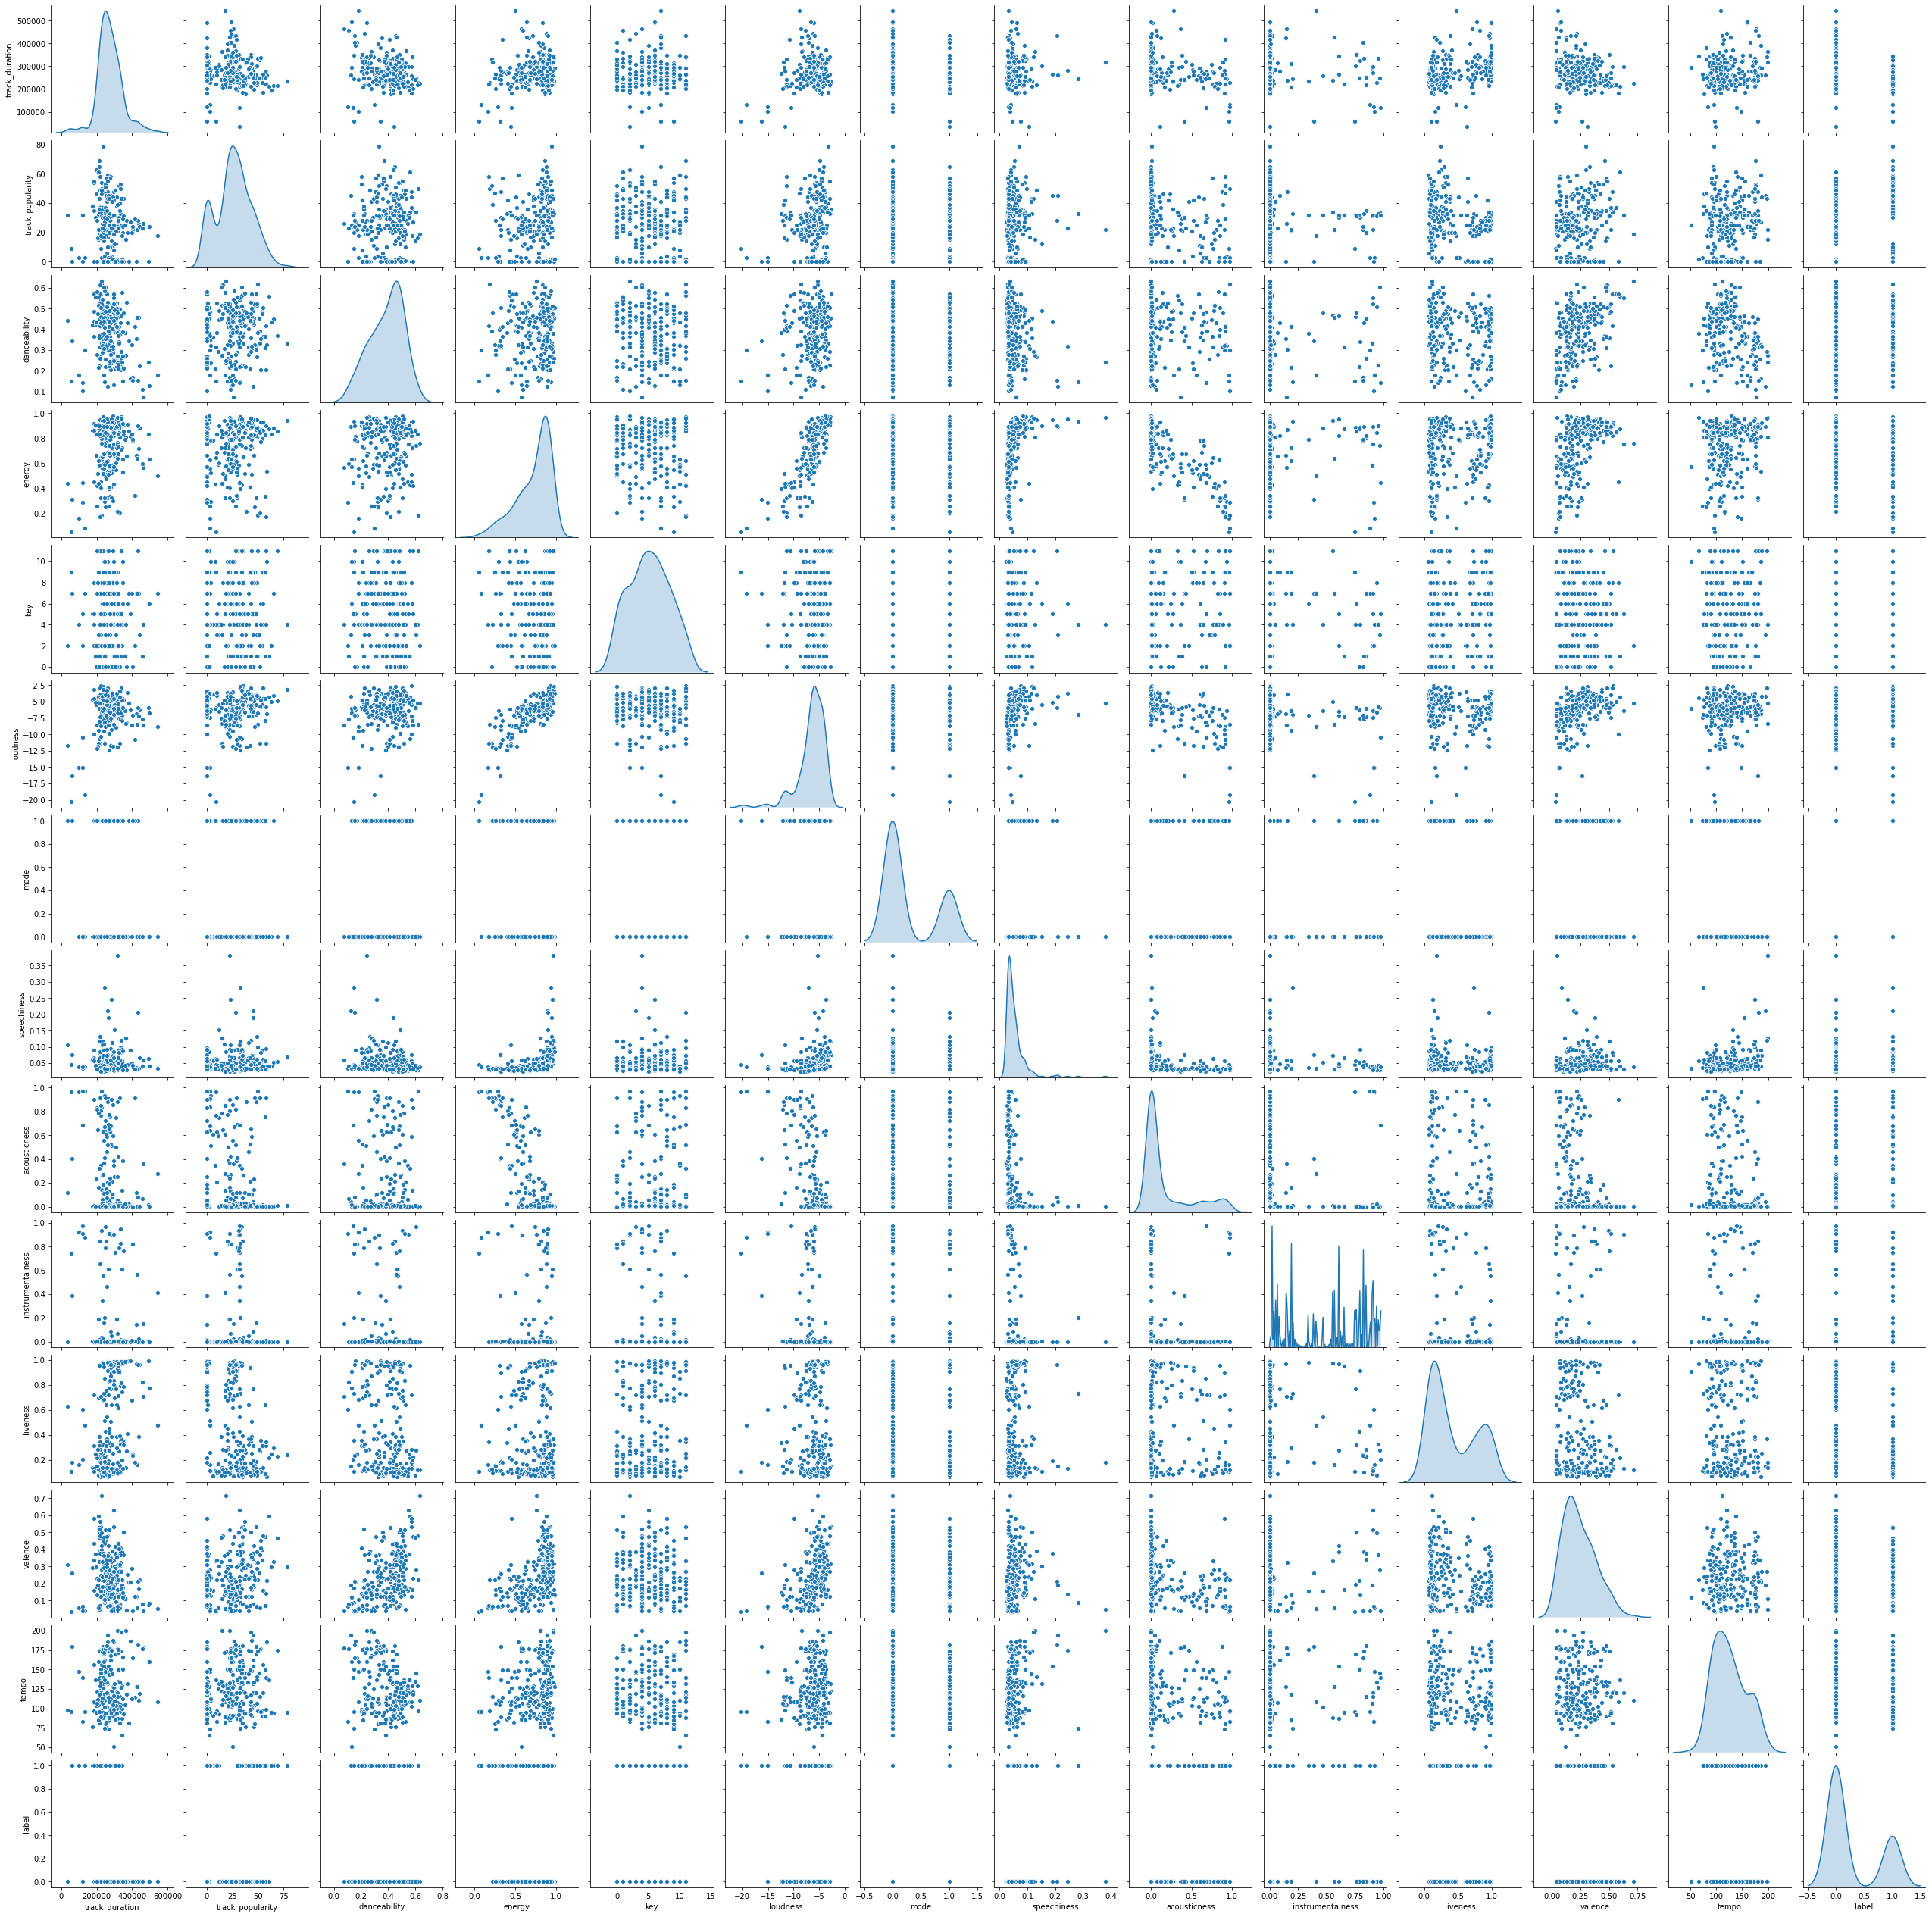

In [15]:
sns.pairplot(df_tracks, diag_kind='kde')

As a general rule of thumb:

- If skewness is less than -1 or greater than 1, the distribution is highly skewed.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

Ref: https://help.gooddata.com/doc/en/reporting-and-dashboards/maql-analytical-query-language/maql-expression-reference/aggregation-functions/statistical-functions/predictive-statistical-use-cases/normality-testing-skewness-and-kurtosis

So we will apply our method against skeweness only for features with skeweness under -0.5 and above 0.5.

In [16]:
skewed_vars = [col for col in X.columns if ((pd.Series(X[col]).skew() <= -0.5) or (pd.Series(X[col]).skew() >= 0.5))]
skewed_vars

['energy',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence']

In [17]:
X.describe()

,track_duration,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,275464.330508,26.737288,0.388428,0.729803,5.199153,-6.392898,0.300847,0.055722,0.187202,0.098934,0.424531,0.240667,125.784047
std,69030.969440,16.815357,0.122287,0.207985,3.168757,2.616247,0.459601,0.040415,0.301978,0.255426,0.338116,0.138390,31.574482
min,34226.000000,0.000000,0.074000,0.056000,0.000000,-20.266000,0.000000,0.023700,0.000002,0.000000,0.064400,0.034300,50.916000
25%,235046.500000,18.000000,0.307000,0.596500,3.000000,-7.227250,0.000000,0.033575,0.001510,0.000000,0.120750,0.133750,100.030000
50%,266795.500000,26.500000,0.413000,0.813000,5.000000,-5.955500,0.000000,0.044000,0.009170,0.000077,0.279500,0.219500,119.989500
75%,312193.000000,37.000000,0.481500,0.888250,8.000000,-4.613000,1.000000,0.061625,0.255000,0.002388,0.769250,0.332250,149.332000
max,542320.000000,79.000000,0.634000,0.979000,11.000000,-2.624000,1.000000,0.380000,0.973000,0.976000,0.994000,0.715000,199.691000


We can see that the data is not in the same scale as well some features are skewed so let's apply some pre-processing since not all models can deal with these two problems which can impact performance of models in a negative way.

Because `loudness` have negative values we cannot use `log()` or [`box_cox`](https://www.statisticshowto.com/box-cox-transformation/) as method to remove skeweness so we will apply `sqrt()`.

After that we will use `StandardScaler` to scale the data.

## Unskew variables

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


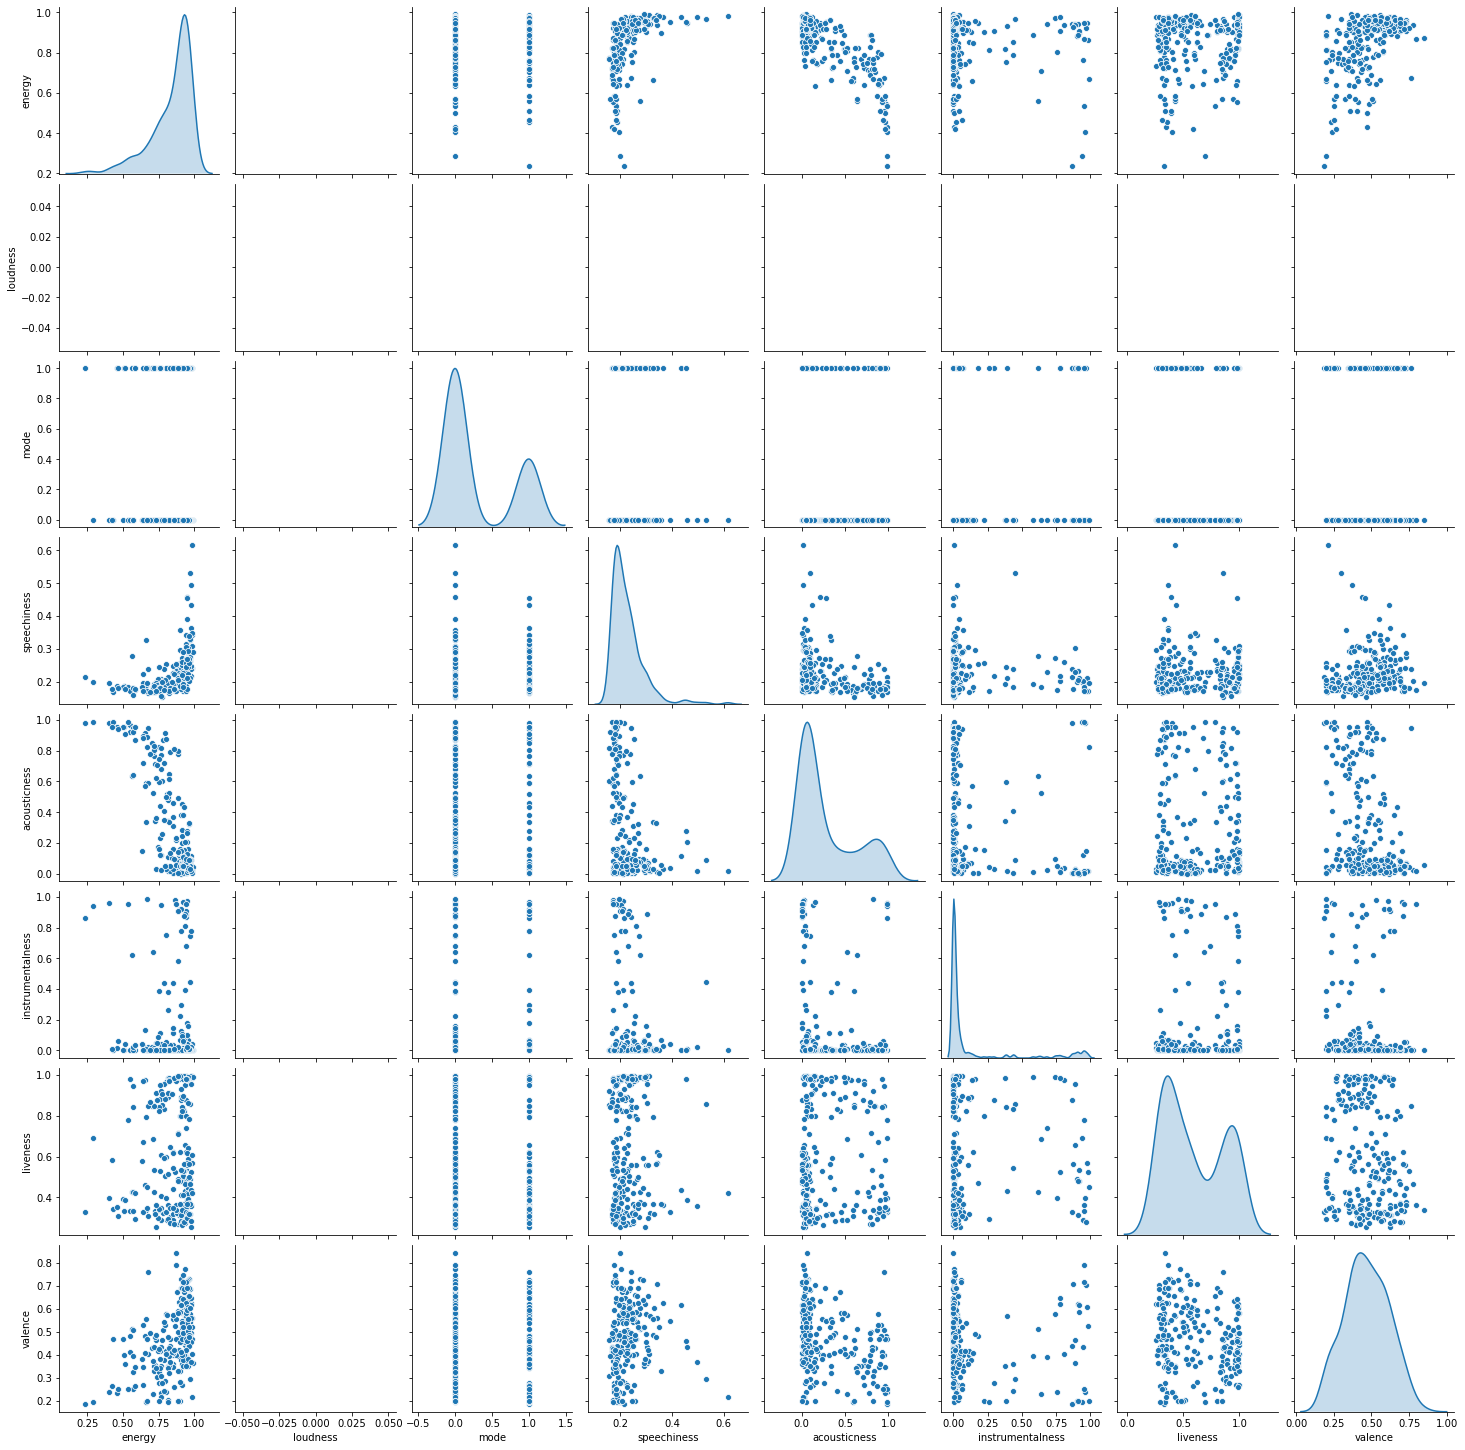

In [22]:
# Unskew the data
df_tracks_sqrt = df_tracks[skewed_vars]
df_tracks_sqrt[skewed_vars] = df_tracks[skewed_vars].apply(np.sqrt, axis=0)
# df_tracks_sqrt = np.sqrt(df_tracks)

# Plot the pairwise relationships between the transformed variables 
sns.pairplot(df_tracks_sqrt[skewed_vars], diag_kind='kde')

# Display the chart
plt.show()

In [23]:
for col in skewed_vars:
    print(col)
    print("skew before:",pd.Series(df_tracks[col]).skew())
    print("skew after:",pd.Series(df_tracks_sqrt[col]).skew())
    print("\n")
    

energy
skew before: -1.1008229291453866
skew after: -1.5924881758703706


loudness
skew before: -2.0037918896919598
skew after: nan


mode
skew before: 0.8740389413718801
skew after: 0.8740389413718801


speechiness
skew before: 4.196388665749262
skew after: 2.495469872625528


acousticness
skew before: 1.470187096731542
skew after: 1.0150993783633668


instrumentalness
skew before: 2.50256748543744
skew after: 2.1619565195057078


liveness
skew before: 0.5754039044832042
skew after: 0.34066605227162217


valence
skew before: 0.6780644488671452
skew after: 0.05307765343415839




It reduced in some cases but not completely. One alternative when there are negative values is to apply `yeo-johnson` method.

In [24]:
from sklearn.preprocessing import PowerTransformer

# Initialize PowerTransforme to use yeo-johnson (default)

pt = PowerTransformer()
pt.fit(df_tracks[skewed_vars])

# Apply method to the selected variables

df_tracks_yj = pt.transform(df_tracks[skewed_vars])

# Create a `pandas` DataFrame from the scaled dataset
df_tracks_yj = pd.DataFrame(data=df_tracks_yj,
                                       index=df_tracks.index,
                                       columns=skewed_vars)


df_tracks_yj.head()

,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
track_id,,,,,,,,
7ui6fTzMeE6JCr0GWvc14n,-1.129410,-0.463725,-0.655975,-0.404998,-0.782503,-0.393392,-1.355183,-0.023622
5F29kjOr9bYTUtSPLoixHB,0.223970,-0.010636,1.524449,0.311773,-0.755650,-0.462535,-1.119291,0.131458
3nK9XoQh7wR3iOaWfMLXAr,-1.974407,-2.751107,1.524449,-0.058447,1.730620,2.410601,-1.067651,-1.864849
23M0gC4uZGwVhbWsHdtdyY,-0.946345,0.147098,-0.655975,-0.187221,1.595415,-0.448085,-0.741935,-1.602991
4HDd1hurlRFK7Mz1BCnv1f,-0.873950,-0.328247,-0.655975,-1.065001,1.675423,-0.463187,-1.080147,0.286660


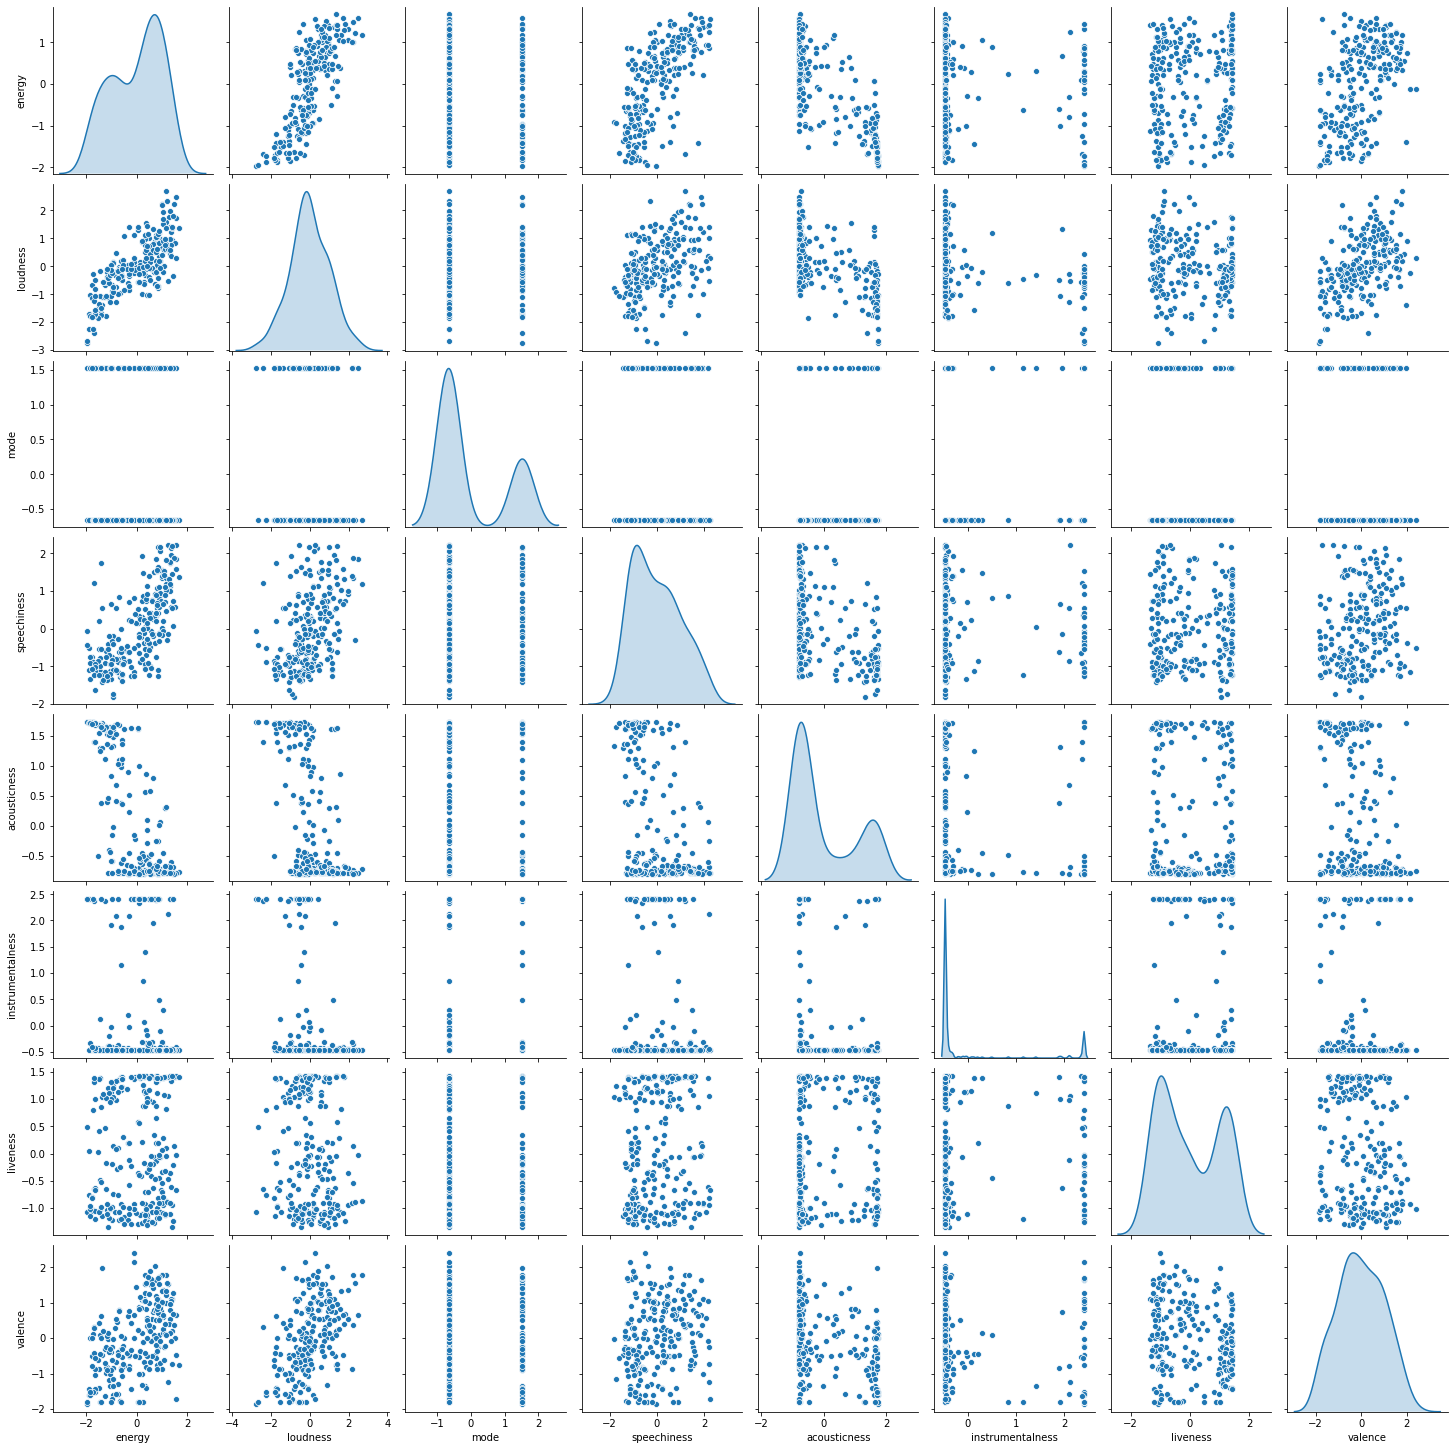

In [25]:
# Plot the pairwise relationships between the transformed variables 
sns.pairplot(df_tracks_yj, diag_kind='kde')

# Display the chart
plt.show()

In [26]:
for col in skewed_vars:
    print(col)
    print("skew before:",pd.Series(df_tracks[col]).skew())
    print("skew after:",pd.Series(df_tracks_yj[col]).skew())
    print("\n")
    

energy
skew before: -1.1008229291453866
skew after: -0.32821253987491456


loudness
skew before: -2.0037918896919598
skew after: 0.0002999959328985544


mode
skew before: 0.8740389413718801
skew after: 0.8740389413718802


speechiness
skew before: 4.196388665749262
skew after: 0.4323248963113678


acousticness
skew before: 1.470187096731542
skew after: 0.8123012236713351


instrumentalness
skew before: 2.50256748543744
skew after: 1.872460369375003


liveness
skew before: 0.5754039044832042
skew after: 0.22932748331493447


valence
skew before: 0.6780644488671452
skew after: 0.055978493456015146




Some features still have high skeweness but the values are better when using `yeo-johnson`.

In [27]:
df_tracks_new = df_tracks.copy()

# replace columns transformed by yeo-johnson

df_tracks_new[skewed_vars] = df_tracks_yj[skewed_vars]
df_tracks_new.head()

,track_duration,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
track_id,,,,,,,,,,,,,,
7ui6fTzMeE6JCr0GWvc14n,262499,59,0.326,-1.129410,10,-0.463725,-0.655975,-0.404998,-0.782503,-0.393392,-1.355183,-0.023622,185.731,1
5F29kjOr9bYTUtSPLoixHB,252066,46,0.455,0.223970,9,-0.010636,1.524449,0.311773,-0.755650,-0.462535,-1.119291,0.131458,76.036,1
3nK9XoQh7wR3iOaWfMLXAr,57560,9,0.149,-1.974407,9,-2.751107,1.524449,-0.058447,1.730620,2.410601,-1.067651,-1.864849,96.103,1
23M0gC4uZGwVhbWsHdtdyY,290546,11,0.292,-0.946345,4,0.147098,-0.655975,-0.187221,1.595415,-0.448085,-0.741935,-1.602991,124.749,1
4HDd1hurlRFK7Mz1BCnv1f,307720,12,0.447,-0.873950,3,-0.328247,-0.655975,-1.065001,1.675423,-0.463187,-1.080147,0.286660,92.895,1


## Normalize variables

In [28]:
# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(df_tracks_new)

# Scale and center the data
df_tracks_scaled = scaler.transform(df_tracks_new)
df_tracks_scaled

# Create a `pandas` DataFrame from the scaled dataset
df_tracks_scaled = pd.DataFrame(data=df_tracks_scaled,
                                       index=df_tracks.index,
                                       columns=df_tracks_new.columns)


df_tracks_scaled.head()

,track_duration,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
track_id,,,,,,,,,,,,,,
7ui6fTzMeE6JCr0GWvc14n,-0.188218,1.922724,-0.511587,-1.129410,1.518277,-0.463725,-0.655975,-0.404998,-0.782503,-0.393392,-1.355183,-0.023622,1.902624,1.539944
5F29kjOr9bYTUtSPLoixHB,-0.339675,1.147978,0.545547,0.223970,1.202025,-0.010636,1.524449,0.311773,-0.755650,-0.462535,-1.119291,0.131458,-1.578926,1.539944
3nK9XoQh7wR3iOaWfMLXAr,-3.163326,-1.057069,-1.962074,-1.974407,1.202025,-2.751107,1.524449,-0.058447,1.730620,2.410601,-1.067651,-1.864849,-0.942031,1.539944
23M0gC4uZGwVhbWsHdtdyY,0.218941,-0.937877,-0.790212,-0.946345,-0.379234,0.147098,-0.655975,-0.187221,1.595415,-0.448085,-0.741935,-1.602991,-0.032851,1.539944
4HDd1hurlRFK7Mz1BCnv1f,0.468257,-0.878281,0.479988,-0.873950,-0.695486,-0.328247,-0.655975,-1.065001,1.675423,-0.463187,-1.080147,0.286660,-1.043848,1.539944


In [29]:
# Print the mean and standard deviation for all columns
print(df_tracks_scaled.agg(['mean','std']).round())

      track_duration  track_popularity  danceability  energy  key  loudness  \
mean  0.0             0.0               0.0          -0.0    -0.0 -0.0        
std   1.0             1.0               1.0           1.0     1.0  1.0        

      mode  speechiness  acousticness  instrumentalness  liveness  valence  \
mean  0.0   0.0          0.0           0.0              -0.0       0.0       
std   1.0   1.0          1.0           1.0               1.0       1.0       

      tempo  label  
mean -0.0    0.0    
std   1.0    1.0    


Checking if the data is unskewed.

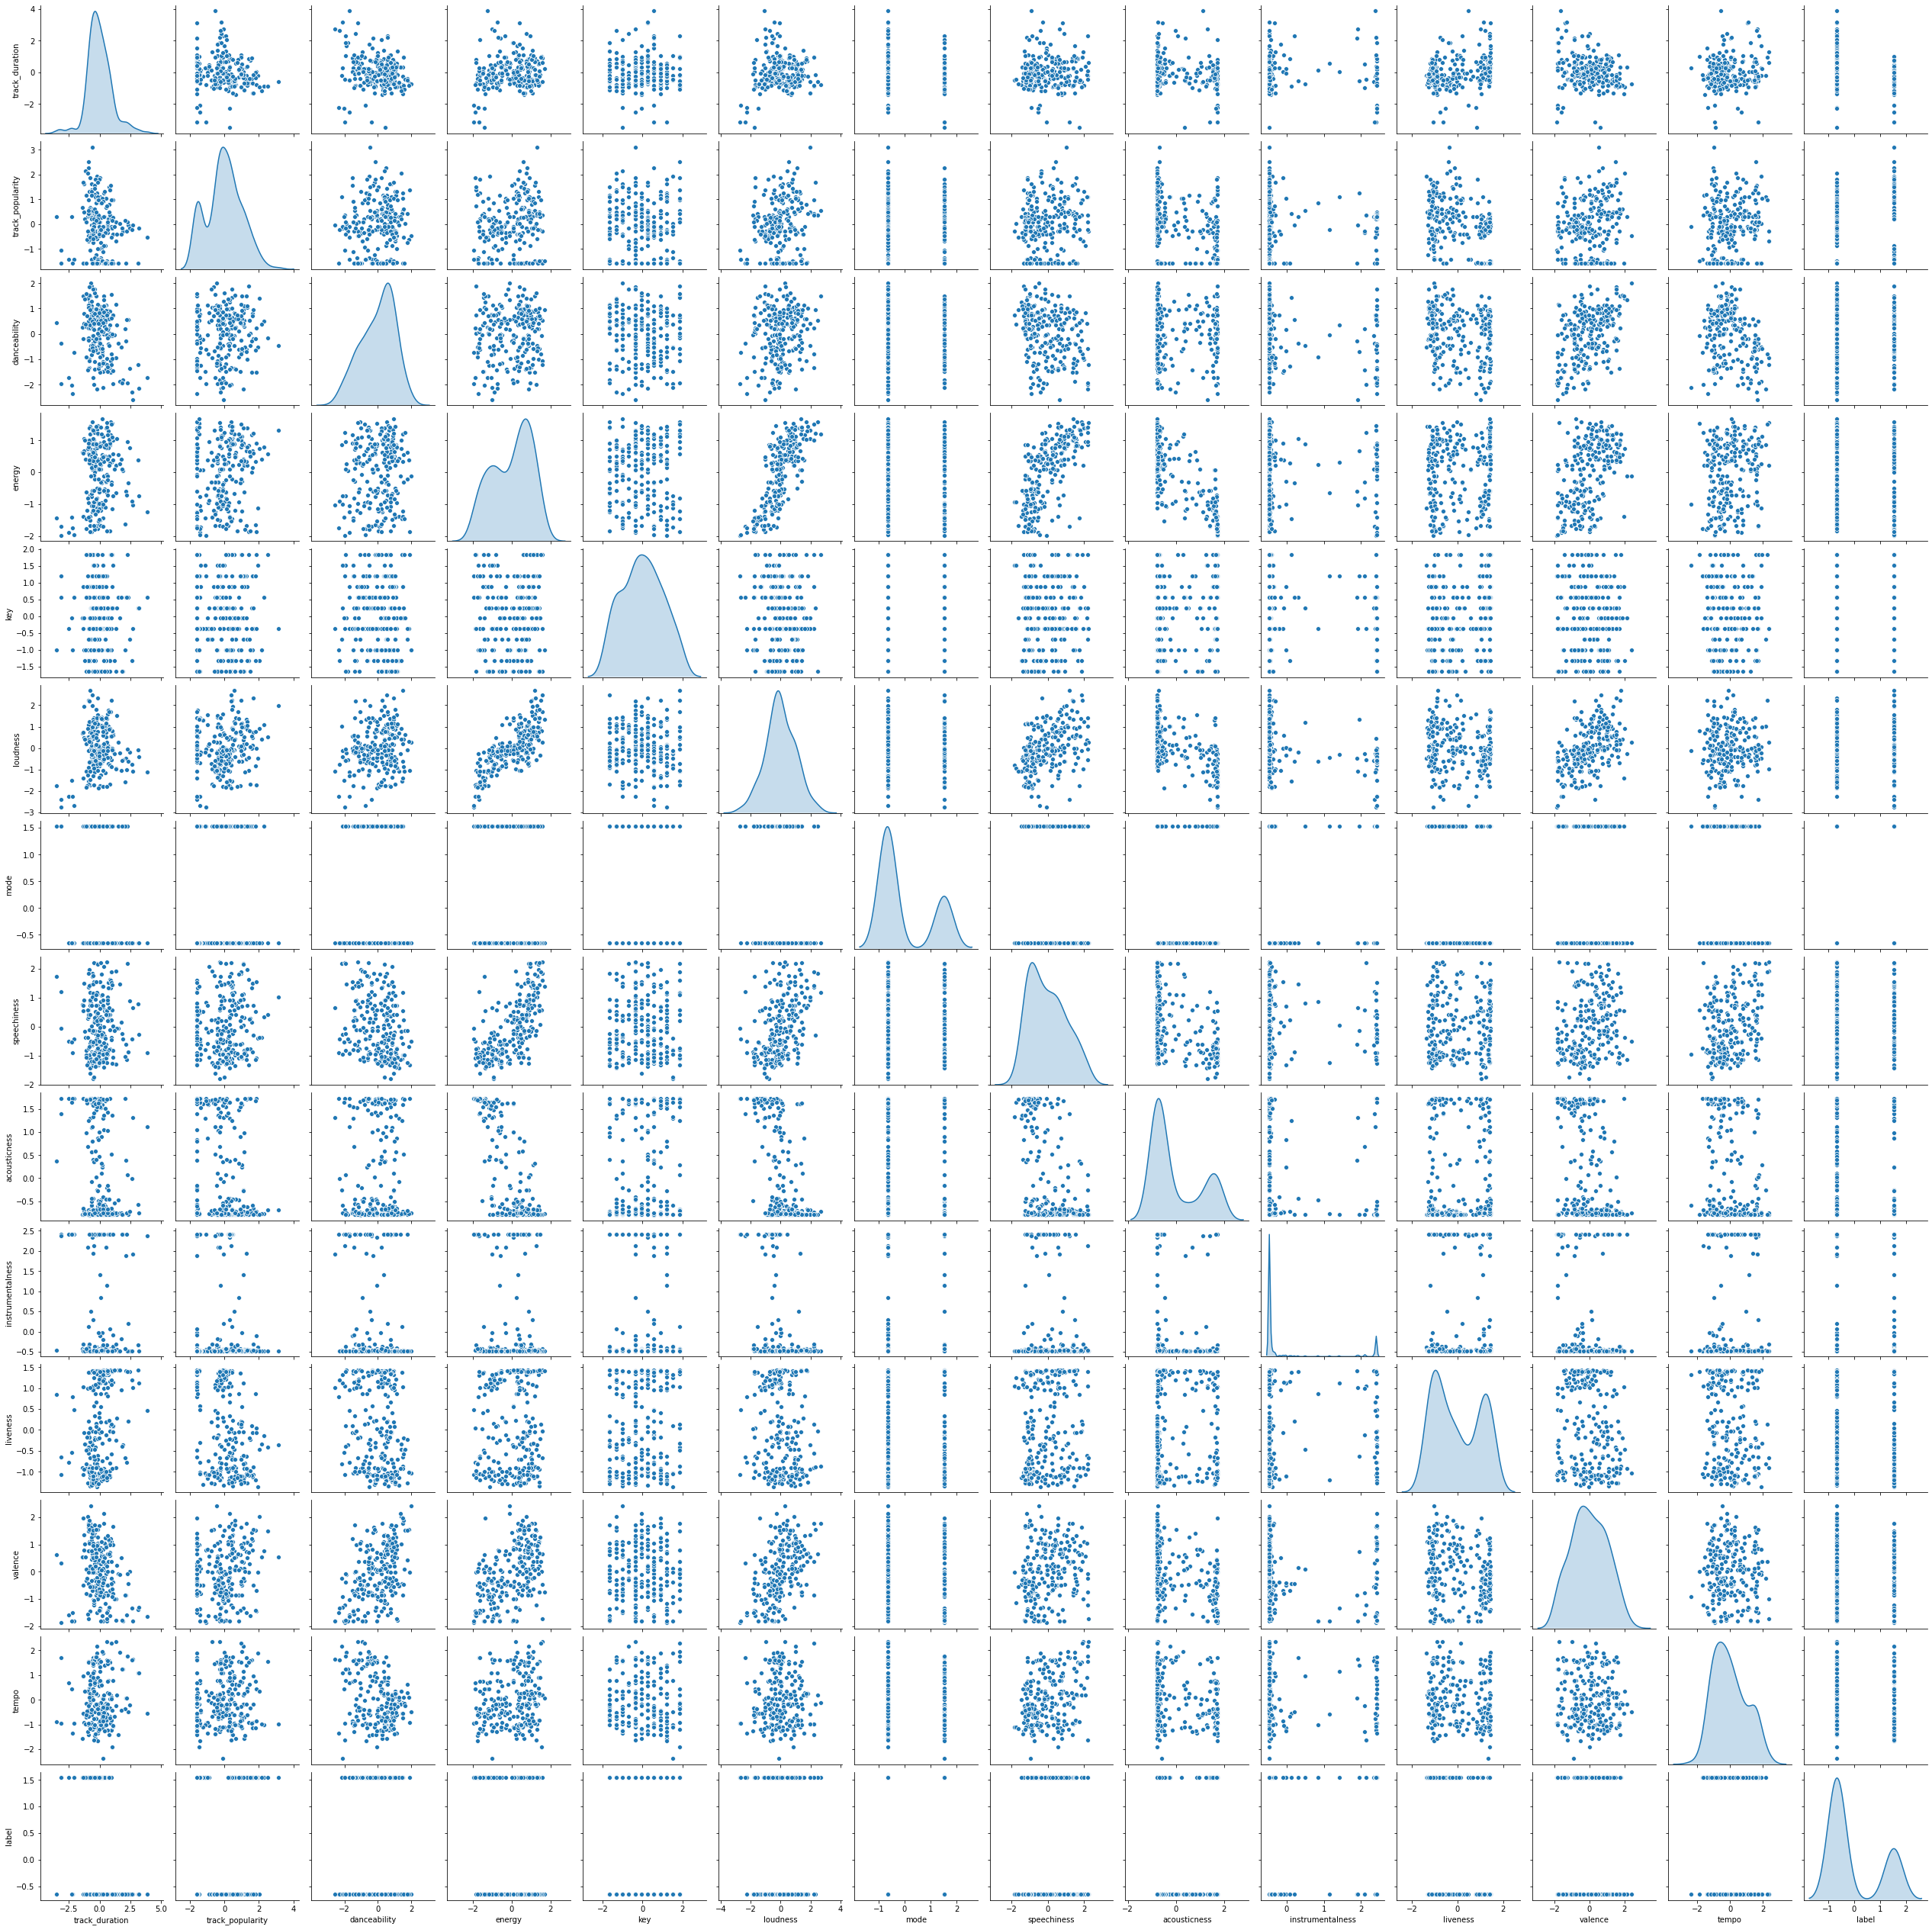

In [30]:
sns.pairplot(df_tracks_scaled, diag_kind='kde')

## Split data

In [31]:
print(X.columns)
print(X.shape)
print(y.shape)

Index(['track_duration', 'track_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'],
      dtype='object')
(236, 13)
(236,)


In [32]:
# split data in train and test using stratify = y to make sure the classes will be well distributed both in training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(188, 13) (48, 13) (188,) (48,)


# Models

## K-nn

In [33]:
import math

n = math.sqrt(X_train.shape[0]) 
n

13.711309200802088

In [34]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn_model = knn.fit(X_train, y_train)

print('k-NN accuracy for train set: %f' % knn_model.score(X_train, y_train))
print('k-NN accuracy for test set: %f' % knn_model.score(X_test, y_test))

k-NN accuracy for train set: 0.739362
k-NN accuracy for test set: 0.729167


In [35]:
y_true, y_pred = y_test, knn_model.predict(X_test)
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        34
           1       0.57      0.29      0.38        14

    accuracy                           0.73        48
   macro avg       0.66      0.60      0.60        48
weighted avg       0.70      0.73      0.70        48



## Decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1)

# Fit model
tree.fit(X_train, y_train)

print('Decision tree accuracy for train set: %f' % tree.score(X_train, y_train))
print('Decision tree accuracy for test set: %f' % tree.score(X_test, y_test))

y_true, y_pred = y_test, tree.predict(X_test)
print(metrics.classification_report(y_true, y_pred))

Decision tree accuracy for train set: 1.000000
Decision tree accuracy for test set: 0.750000
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        34
           1       0.56      0.64      0.60        14

    accuracy                           0.75        48
   macro avg       0.70      0.72      0.71        48
weighted avg       0.76      0.75      0.75        48



With accuracy of 1 for training set it seems that this model is overfitting.

In [38]:
pd.DataFrame({"Feature":X.columns, "Importance":tree.feature_importances_}).sort_values("Importance", ascending = False)

,Feature,Importance
1,track_popularity,0.217044
10,liveness,0.139582
3,energy,0.117853
0,track_duration,0.105918
5,loudness,0.096362
9,instrumentalness,0.085245
4,key,0.065196
2,danceability,0.041480
11,valence,0.039562
12,tempo,0.035735


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)

# Fit model
rf.fit(X_train, y_train)

print('Random Forest accuracy for train set: %f' % rf.score(X_train, y_train))
print('Random Forest accuracy for test set: %f' % rf.score(X_test, y_test))

y_true, y_pred = y_test, rf.predict(X_test)
print(metrics.classification_report(y_true, y_pred))

Random Forest accuracy for train set: 1.000000
Random Forest accuracy for test set: 0.854167
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        34
           1       0.82      0.64      0.72        14

    accuracy                           0.85        48
   macro avg       0.84      0.79      0.81        48
weighted avg       0.85      0.85      0.85        48



It seems to be also overfitting but shows a better value of accuracy on test dataset if compared with previous models. I'd like to don't use fine tunning for now but I'm curios so I'll check what are the actual model parameters and test different values of `min_sample_split` (it defines until how many branchs trees will split) in order to fight overfitting.

In [40]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [41]:
num_min_sample_leafs = []
train_acc = []
test_acc = []

for leaf in range(1,10):
    rf = RandomForestClassifier(random_state=1, min_samples_leaf = leaf)

    # Fit model
    rf.fit(X_train, y_train)
    num_min_sample_leafs.append(leaf)
    train_acc.append(rf.score(X_train, y_train))
    test_acc.append(rf.score(X_test, y_test))

df_acc_rf = pd.DataFrame({'num_min_sample_leafs':num_min_sample_leafs, 
                          'train_acc':train_acc,
                         'test_acc':test_acc})    

df_acc_rf

,num_min_sample_leafs,train_acc,test_acc
0,1,1.000000,0.854167
1,2,1.000000,0.812500
2,3,0.978723,0.791667
3,4,0.973404,0.833333
4,5,0.962766,0.812500
5,6,0.952128,0.812500
6,7,0.946809,0.812500
7,8,0.909574,0.791667
8,9,0.893617,0.812500


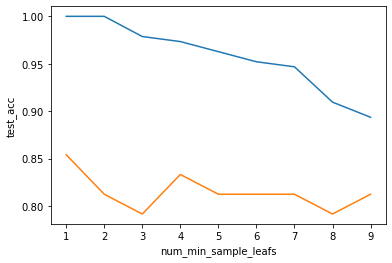

In [42]:
sns.lineplot(data = df_acc_rf, x='num_min_sample_leafs', y='train_acc')
sns.lineplot(data = df_acc_rf, x='num_min_sample_leafs', y='test_acc')
plt.show()

For `min_sample_leaf = 4` the max value of accuracy for training is achieved (in the interval considered) with a accuracy for training that is different than 1.00.

In [43]:
rf = RandomForestClassifier(random_state=1, min_samples_leaf = 4)

# Fit model
rf.fit(X_train, y_train)

print('Random Forest accuracy for train set: %f' % rf.score(X_train, y_train))
print('Random Forest accuracy for test set: %f' % rf.score(X_test, y_test))

y_true, y_pred = y_test, rf.predict(X_test)
print(metrics.classification_report(y_true, y_pred))


Random Forest accuracy for train set: 0.973404
Random Forest accuracy for test set: 0.833333
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.80      0.57      0.67        14

    accuracy                           0.83        48
   macro avg       0.82      0.76      0.78        48
weighted avg       0.83      0.83      0.82        48



In [44]:
pd.DataFrame({"Feature":X.columns, "Importance":rf.feature_importances_}).sort_values("Importance", ascending = False)

,Feature,Importance
1,track_popularity,0.194445
0,track_duration,0.123195
9,instrumentalness,0.111303
10,liveness,0.088965
12,tempo,0.085997
7,speechiness,0.071868
3,energy,0.070420
8,acousticness,0.063035
11,valence,0.056713
2,danceability,0.053898


## XGboost

In [45]:
!pip install https://s3-us-west-2.amazonaws.com/xgboost-nightly-builds/xgboost-[version]+[commithash]-py2.py3-none-manylinux1_x86_64.whl

ERROR: xgboost-[version]+[commithash]-py2.py3-none-manylinux1_x86_64.whl is not a supported wheel on this platform.


In [46]:
from xgboost import XGBClassifier

# train XGBoost model with default parameters
xgb = XGBClassifier(random_state = 1)
xgb.fit(X_train, y_train, verbose=False)

print('XGBoost accuracy for train set: %f' % xgb.score(X_train, y_train))
print('XGBoost accuracy for test set: %f' % xgb.score(X_test, y_test))

y_true, y_pred = y_test, rf.predict(X_test)
print(metrics.classification_report(y_true, y_pred))


XGBoost accuracy for train set: 1.000000
XGBoost accuracy for test set: 0.875000
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.80      0.57      0.67        14

    accuracy                           0.83        48
   macro avg       0.82      0.76      0.78        48
weighted avg       0.83      0.83      0.82        48



Again it seems that is overfitting.

In [47]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Let's play a bit with parameter `max_depth`.

In [48]:
num_max_depth = []
train_acc = []
test_acc = []

for depth in range(1,10):
    xgb = XGBClassifier(max_depth = depth, random_state = 1)
    xgb.fit(X_train, y_train, verbose=False)
    
    # Fit model
    xgb.fit(X_train, y_train)
    num_max_depth.append(depth)
    train_acc.append(xgb.score(X_train, y_train))
    test_acc.append(xgb.score(X_test, y_test))

df_acc_xgb = pd.DataFrame({'num_max_depth':num_max_depth, 
                          'train_acc':train_acc,
                         'test_acc':test_acc})    

df_acc_xgb

,num_max_depth,train_acc,test_acc
0,1,0.973404,0.895833
1,2,1.000000,0.875000
2,3,1.000000,0.875000
3,4,1.000000,0.895833
4,5,1.000000,0.875000
5,6,1.000000,0.875000
6,7,1.000000,0.875000
7,8,1.000000,0.875000
8,9,1.000000,0.875000


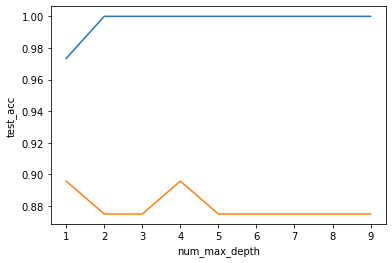

In [49]:
sns.lineplot(data = df_acc_xgb, x='num_max_depth', y='train_acc')
sns.lineplot(data = df_acc_xgb, x='num_max_depth', y='test_acc')
plt.show()

For `max_depth = 1` the max value of accuracy for test is achieved (in the interval considered) with a accuracy for training that is different than 1.00.

In [50]:
# train XGBoost model with default parameters
xgb = XGBClassifier(random_state = 1, max_depth = 1)
xgb.fit(X_train, y_train, verbose=False)

print('XGBoost accuracy for train set: %f' % xgb.score(X_train, y_train))
print('XGBoost accuracy for test set: %f' % xgb.score(X_test, y_test))

y_true, y_pred = y_test, xgb.predict(X_test)
print(metrics.classification_report(y_true, y_pred))

# and save our model
xgb.save_model("./model/xgboost_md_1.model")

XGBoost accuracy for train set: 0.973404
XGBoost accuracy for test set: 0.895833
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.80      0.86      0.83        14

    accuracy                           0.90        48
   macro avg       0.87      0.88      0.88        48
weighted avg       0.90      0.90      0.90        48



Fine-tunning a bit (only max_depth) we achieved a train set accuracy of 97.34% and test set accuracy of 89.58.

In [51]:
pd.DataFrame({"Feature":X.columns, "Importance":xgb.feature_importances_}).sort_values("Importance", ascending = False)

,Feature,Importance
10,liveness,0.147745
0,track_duration,0.131629
2,danceability,0.121437
12,tempo,0.118933
1,track_popularity,0.105333
8,acousticness,0.079072
7,speechiness,0.077031
9,instrumentalness,0.074720
5,loudness,0.040693
11,valence,0.039687


## Adaboost

In [52]:
from sklearn.ensemble import AdaBoostClassifier

# train adaoost model with default parameters
ada = AdaBoostClassifier(random_state = 1)
ada.fit(X_train, y_train)

print('AdaBoost accuracy for train set: %f' % ada.score(X_train, y_train))
print('AdaBoost accuracy for test set: %f' % ada.score(X_test, y_test))

y_true, y_pred = y_test, ada.predict(X_test)
print(metrics.classification_report(y_true, y_pred))


AdaBoost accuracy for train set: 1.000000
AdaBoost accuracy for test set: 0.895833
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        34
           1       0.76      0.93      0.84        14

    accuracy                           0.90        48
   macro avg       0.87      0.91      0.88        48
weighted avg       0.91      0.90      0.90        48



In [53]:
num_estimators = []
train_acc = []
test_acc = []

for n in range(1,100,5):
    ada = AdaBoostClassifier(random_state = 1, n_estimators = n)
    ada.fit(X_train, y_train)
    
    # Fit model
    ada.fit(X_train, y_train)
    num_estimators.append(n)
    train_acc.append(ada.score(X_train, y_train))
    test_acc.append(ada.score(X_test, y_test))

df_acc_ada = pd.DataFrame({'num_estimators':num_estimators, 
                          'train_acc':train_acc,
                         'test_acc':test_acc})    

df_acc_ada

,num_estimators,train_acc,test_acc
0,1,0.739362,0.708333
1,6,0.882979,0.812500
2,11,0.925532,0.833333
3,16,0.952128,0.812500
4,21,0.973404,0.812500
5,26,0.994681,0.875000
6,31,0.994681,0.875000
7,36,1.000000,0.895833
8,41,1.000000,0.875000
9,46,1.000000,0.895833


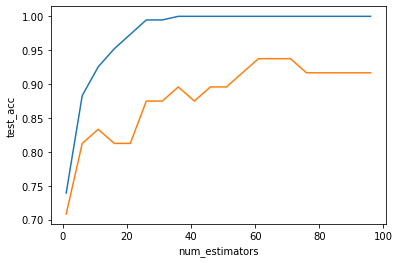

In [54]:
sns.lineplot(data = df_acc_ada, x='num_estimators', y='train_acc')
sns.lineplot(data = df_acc_ada, x='num_estimators', y='test_acc')
plt.show()

AdaBoost with 26 estimators provides the highest test accuracy with also high training accuracy different from 1.

In [55]:
# train adaoost model with default parameters
ada = AdaBoostClassifier(random_state = 1, n_estimators = 26)
ada.fit(X_train, y_train)

print('AdaBoost accuracy for train set: %f' % ada.score(X_train, y_train))
print('AdaBoost accuracy for test set: %f' % ada.score(X_test, y_test))

y_true, y_pred = y_test, ada.predict(X_test)
print(metrics.classification_report(y_true, y_pred))


AdaBoost accuracy for train set: 0.994681
AdaBoost accuracy for test set: 0.875000
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        34
           1       0.75      0.86      0.80        14

    accuracy                           0.88        48
   macro avg       0.84      0.87      0.85        48
weighted avg       0.88      0.88      0.88        48



In [56]:
pd.DataFrame({"Feature":X.columns, "Importance":ada.feature_importances_}).sort_values("Importance", ascending = False)

,Feature,Importance
1,track_popularity,0.269231
9,instrumentalness,0.269231
0,track_duration,0.115385
5,loudness,0.076923
8,acousticness,0.076923
2,danceability,0.038462
7,speechiness,0.038462
10,liveness,0.038462
11,valence,0.038462
12,tempo,0.038462


# Using AutoML to choose the best model


> Automated machine learning (or AutoML for short) is the task of removing human labor from the process of training machine learning models. Currently most AutoML research is focused on automating model selection and hyperparameter tuning. [This video](https://www.youtube.com/watch?v=Rsg_XzgGqZw&utm_medium=notebook&utm_source=kaggle&utm_campaign=automl-event) goes into more details.


We will be using here 2 open source libraries:

* [TPOT](https://epistasislab.github.io/tpot/), an open source automated machine learning library developed at the University of Pennsylvania
* [H20.ai AutoML](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html), a second open source automated machine learning library developed by researchers at H20.ai


## TPOT

This is an academic library built on top of scikit-learn. When you export a model you're actually exporting all the Python code you need to train that model.

In [57]:
from tpot import TPOTClassifier

# create & fit TPOT classifier with 
tpot = TPOTClassifier(generations=8, population_size=20, 
                      verbosity=2, early_stop=2)
tpot.fit(X_train, y_train)

# save our model code
tpot.export('./model/tpot_pipeline.py')

# print the model code to see what it says
!cat tpot_pipeline.py

Generation 1 - Current best internal CV score: 0.8411095305832147
Generation 2 - Current best internal CV score: 0.8411095305832147
Generation 3 - Current best internal CV score: 0.8460881934566146
Generation 4 - Current best internal CV score: 0.8460881934566146
Generation 5 - Current best internal CV score: 0.89900426742532
Generation 6 - Current best internal CV score: 0.89900426742532
Generation 7 - Current best internal CV score: 0.89900426742532

The optimized pipeline was not improved after evaluating 2 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=6, max_features=0.7000000000000001, min_samples_leaf=6, min_samples_split=15, n_estimators=100, subsample=0.35000000000000003)
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import R

# [H20.ai AutoML](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)

One of the interesting things about this library is that, as each model is trained, its evaluated both on its own and as part of a stacked ensemble.

In [58]:
import h2o
from h2o.automl import H2OAutoML

# initilaize an H20 instance running locally
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.241-b07, mixed mode, sharing)


C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\server.py:385: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\danib\AppData\Local\Temp\tmpgvuwx7rz
  JVM stdout: C:\Users\danib\AppData\Local\Temp\tmpgvuwx7rz\h2o_danib_started_from_python.out
  JVM stderr: C:\Users\danib\AppData\Local\Temp\tmpgvuwx7rz\h2o_danib_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_danib_tezz4y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,247.5 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [59]:
# convert our data to h20Frame, an alternative to pandas datatables
train_data = h2o.H2OFrame(X_train)
test_data = h2o.H2OFrame(list(y_train))

train_data = train_data.cbind(test_data)

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(y="C1", training_frame=train_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |
20:01:39.203: AutoML: XGBoost is not available; skipping it.

█████████
20:01:45.261: Skipping training of model GBM_5_AutoML_20200531_200139 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20200531_200139.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 188.0.


███████████████████████████████████████████████| 100%


In [60]:
# View the top five models from the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=5)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
DeepLearning_grid__3_AutoML_20200531_200139_model_2,0.0911668,0.301938,0.0911668,0.202137,0.213273
DeepLearning_grid__2_AutoML_20200531_200139_model_2,0.0916737,0.302777,0.0916737,0.213115,0.212951
StackedEnsemble_AllModels_AutoML_20200531_200139,0.0934085,0.305628,0.0934085,0.216834,0.212746
StackedEnsemble_BestOfFamily_AutoML_20200531_200139,0.0986194,0.314037,0.0986194,0.212585,0.220543
DeepLearning_grid__3_AutoML_20200531_200139_model_1,0.0990183,0.314672,0.0990183,0.187004,0.222558


In [61]:
# The leader model can be access with `aml.leader`
aml.leader

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__3_AutoML_20200531_200139_model_2


Status of Neuron Layers: predicting C1, regression, gaussian distribution, Quadratic loss, 508,501 weights/biases, 5.8 MB, 127,840 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,13,Input,10,,,,,,,,,
1,,2,500,RectifierDropout,0,0,0,0.00880114,0.0067475,0,0.00216205,0.101724,0.416896,0.0629472
2,,3,500,RectifierDropout,0,0,0,0.0389451,0.0481307,0,-0.00719014,0.0500792,0.983706,0.0136737
3,,4,500,RectifierDropout,0,0,0,0.0614094,0.144873,0,-0.00781629,0.0480641,0.980382,0.0216403
4,,5,1,Linear,,0,0,0.00136435,0.0011795,0,-0.000577558,0.062462,0.230197,1.09713e-154




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.006652635583911769
RMSE: 0.08156369035245872
MAE: 0.061521739324027845
RMSLE: 0.060121516235953396
Mean Residual Deviance: 0.006652635583911769

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.09116677350349114
RMSE: 0.30193836043717787
MAE: 0.20213652865308926
RMSLE: 0.21327319300738246
Mean Residual Deviance: 0.09116677350349114

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.20224755,0.03203371,0.22260642,0.19520846,0.16805556,0.17911518,0.24625213
1,mean_residual_deviance,0.09122918,0.018883418,0.09372284,0.08363102,0.08460171,0.072098754,0.12209157
2,mse,0.09122918,0.018883418,0.09372284,0.08363102,0.08460171,0.072098754,0.12209157
3,r2,0.5381707,0.16196717,0.4814721,0.6129385,0.64589894,0.67098933,0.2795545
4,residual_deviance,0.09122918,0.018883418,0.09372284,0.08363102,0.08460171,0.072098754,0.12209157
5,rmse,0.3008248,0.030282315,0.30614185,0.28919026,0.29086372,0.26851213,0.34941605
6,rmsle,0.2119911,0.026584242,0.22844906,0.20406853,0.19721967,0.18152627,0.24869199



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-05-31 20:16:00,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2020-05-31 20:16:04,7 min 42.286 sec,638 obs/sec,10.0,1,1880.0,0.450633,0.203070,0.328628,0.029043
2,,2020-05-31 20:16:10,7 min 48.907 sec,797 obs/sec,40.0,4,7520.0,0.260260,0.067735,0.157534,0.676132
3,,2020-05-31 20:16:16,7 min 54.517 sec,882 obs/sec,70.0,7,13160.0,0.196821,0.038739,0.113746,0.814776
4,,2020-05-31 20:16:21,7 min 59.750 sec,939 obs/sec,100.0,10,18800.0,0.233516,0.054530,0.144627,0.739272
5,,2020-05-31 20:16:28,8 min 6.297 sec,996 obs/sec,140.0,14,26320.0,0.183187,0.033557,0.114723,0.839549
6,,2020-05-31 20:16:34,8 min 12.567 sec,1039 obs/sec,180.0,18,33840.0,0.134508,0.018092,0.076166,0.913493
7,,2020-05-31 20:16:40,8 min 18.642 sec,1074 obs/sec,220.0,22,41360.0,0.138244,0.019111,0.080329,0.908622
8,,2020-05-31 20:16:46,8 min 24.711 sec,1100 obs/sec,260.0,26,48880.0,0.096968,0.009403,0.057462,0.955042
9,,2020-05-31 20:16:52,8 min 30.599 sec,1124 obs/sec,300.0,30,56400.0,0.134002,0.017957,0.087957,0.914143



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,track_popularity,1.000000,1.000000,0.106986
1,speechiness,0.918526,0.918526,0.098269
2,liveness,0.861258,0.861258,0.092142
3,track_duration,0.860824,0.860824,0.092096
4,instrumentalness,0.710107,0.710107,0.075971
5,danceability,0.682533,0.682533,0.073021
6,acousticness,0.674512,0.674512,0.072163
7,loudness,0.667816,0.667816,0.071447
8,tempo,0.658625,0.658625,0.070464
9,key,0.649348,0.649348,0.069471


In [65]:
# save the model out 
h2o.save_model(aml.leader, path = "./model/")

'C:\\PROJECTS_2020\\Project_Evanescence_Within_Temptation\\model\\DeepLearning_grid__3_AutoML_20200531_200139_model_2'